In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
%matplotlib inline

In [22]:
l=['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG', 'class']
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv',header=None,names=l)
print(df)
print(df.describe())
print(df.info())

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG  class
0     65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90      1
1     62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74      1
2     62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89      1
3     58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00      1
4     72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40      1
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...    ...
578   60    Male   0.5  0.1      500    20    34  5.9  1.6  0.37      2
579   40    Male   0.6  0.1       98    35    31  6.0  3.2  1.10      1
580   52    Male   0.8  0.2      245    48    49  6.4  3.2  1.00      1
581   31    Male   1.3  0.5      184    29    32  6.8  3.4  1.00      1
582   38    Male   1.0  0.3      216    21    24  7.3  4.4  1.50      2

[583 rows x 11 columns]
              Age          TB          DB      Alkphos         Sgpt  \
count  583.000000  583.000000  583.00000

In [23]:
print(df.columns)

Index(['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB',
       'AG', 'class'],
      dtype='object')


In [24]:
df1 = df.drop(['class'], axis=1)
print(df1)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG
0     65  Female   0.7  0.1      187    16    18  6.8  3.3  0.90
1     62    Male  10.9  5.5      699    64   100  7.5  3.2  0.74
2     62    Male   7.3  4.1      490    60    68  7.0  3.3  0.89
3     58    Male   1.0  0.4      182    14    20  6.8  3.4  1.00
4     72    Male   3.9  2.0      195    27    59  7.3  2.4  0.40
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...
578   60    Male   0.5  0.1      500    20    34  5.9  1.6  0.37
579   40    Male   0.6  0.1       98    35    31  6.0  3.2  1.10
580   52    Male   0.8  0.2      245    48    49  6.4  3.2  1.00
581   31    Male   1.3  0.5      184    29    32  6.8  3.4  1.00
582   38    Male   1.0  0.3      216    21    24  7.3  4.4  1.50

[583 rows x 10 columns]


<ipython-input-25-b08f2e3172ae>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['class'], sort = True).sort_index()


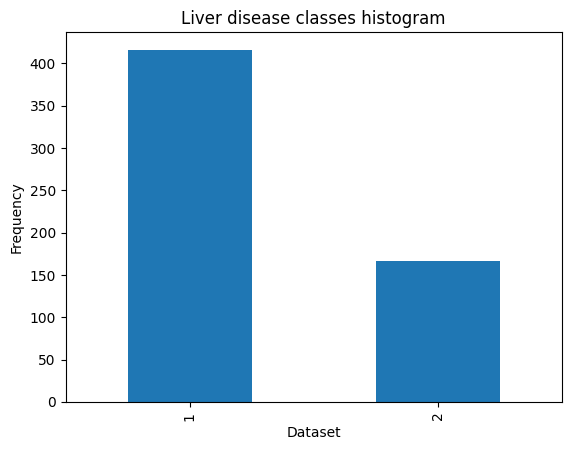

In [25]:
count_classes = pd.value_counts(df['class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title("Liver disease classes histogram")
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.savefig('class.png')

In [26]:
df1['Gender'].replace({'Male':0,'Female':1},inplace=True)
d=df1.query("Gender==0")
print(d)

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG
1     62       0  10.9  5.5      699    64   100  7.5  3.2  0.74
2     62       0   7.3  4.1      490    60    68  7.0  3.3  0.89
3     58       0   1.0  0.4      182    14    20  6.8  3.4  1.00
4     72       0   3.9  2.0      195    27    59  7.3  2.4  0.40
5     46       0   1.8  0.7      208    19    14  7.6  4.4  1.30
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...
578   60       0   0.5  0.1      500    20    34  5.9  1.6  0.37
579   40       0   0.6  0.1       98    35    31  6.0  3.2  1.10
580   52       0   0.8  0.2      245    48    49  6.4  3.2  1.00
581   31       0   1.3  0.5      184    29    32  6.8  3.4  1.00
582   38       0   1.0  0.3      216    21    24  7.3  4.4  1.50

[441 rows x 10 columns]


In [27]:
d1=df1.query("Gender==1")
print(d1)

     Age  Gender    TB    DB  Alkphos  Sgpt  Sgot   TP  ALB    AG
0     65       1   0.7   0.1      187    16    18  6.8  3.3  0.90
6     26       1   0.9   0.2      154    16    12  7.0  3.5  1.00
7     29       1   0.9   0.3      202    14    11  6.7  3.6  1.10
13    74       1   1.1   0.4      214    22    30  8.1  4.1  1.00
18    40       1   0.9   0.3      293   232   245  6.8  3.1  0.80
..   ...     ...   ...   ...      ...   ...   ...  ...  ...   ...
547   50       1  27.7  10.8      380    39   348  7.1  2.3  0.40
549   40       1   2.1   1.0      768    74   141  7.8  4.9  1.60
564   38       1   0.6   0.1      165    22    34  5.9  2.9  0.90
566   50       1   1.0   0.3      191    22    31  7.8  4.0  1.00
568   20       1  16.7   8.4      200    91   101  6.9  3.5  1.02

[142 rows x 10 columns]


In [28]:
print(df1["AG"])

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: AG, Length: 583, dtype: float64


In [29]:
df1.replace('', np.nan, inplace=True)

print(df1)
df1['AG'].fillna(df1['AG'].mean())

     Age  Gender    TB   DB  Alkphos  Sgpt  Sgot   TP  ALB    AG
0     65       1   0.7  0.1      187    16    18  6.8  3.3  0.90
1     62       0  10.9  5.5      699    64   100  7.5  3.2  0.74
2     62       0   7.3  4.1      490    60    68  7.0  3.3  0.89
3     58       0   1.0  0.4      182    14    20  6.8  3.4  1.00
4     72       0   3.9  2.0      195    27    59  7.3  2.4  0.40
..   ...     ...   ...  ...      ...   ...   ...  ...  ...   ...
578   60       0   0.5  0.1      500    20    34  5.9  1.6  0.37
579   40       0   0.6  0.1       98    35    31  6.0  3.2  1.10
580   52       0   0.8  0.2      245    48    49  6.4  3.2  1.00
581   31       0   1.3  0.5      184    29    32  6.8  3.4  1.00
582   38       0   1.0  0.3      216    21    24  7.3  4.4  1.50

[583 rows x 10 columns]


,AG
0,0.900000
1,0.740000
2,0.890000
3,1.000000
4,0.400000
5,1.300000
6,1.000000
7,1.100000
8,1.200000
9,1.000000


In [30]:
imputer = KNNImputer(n_neighbors=3)
na_filled = imputer.fit_transform(df1)
print(na_filled)

[[65.    1.    0.7  ...  6.8   3.3   0.9 ]
 [62.    0.   10.9  ...  7.5   3.2   0.74]
 [62.    0.    7.3  ...  7.    3.3   0.89]
 ...
 [52.    0.    0.8  ...  6.4   3.2   1.  ]
 [31.    0.    1.3  ...  6.8   3.4   1.  ]
 [38.    0.    1.   ...  7.3   4.4   1.5 ]]


In [31]:
df1=pd.DataFrame(na_filled)
print(df1)

        0    1     2    3      4     5      6    7    8     9
0    65.0  1.0   0.7  0.1  187.0  16.0   18.0  6.8  3.3  0.90
1    62.0  0.0  10.9  5.5  699.0  64.0  100.0  7.5  3.2  0.74
2    62.0  0.0   7.3  4.1  490.0  60.0   68.0  7.0  3.3  0.89
3    58.0  0.0   1.0  0.4  182.0  14.0   20.0  6.8  3.4  1.00
4    72.0  0.0   3.9  2.0  195.0  27.0   59.0  7.3  2.4  0.40
..    ...  ...   ...  ...    ...   ...    ...  ...  ...   ...
578  60.0  0.0   0.5  0.1  500.0  20.0   34.0  5.9  1.6  0.37
579  40.0  0.0   0.6  0.1   98.0  35.0   31.0  6.0  3.2  1.10
580  52.0  0.0   0.8  0.2  245.0  48.0   49.0  6.4  3.2  1.00
581  31.0  0.0   1.3  0.5  184.0  29.0   32.0  6.8  3.4  1.00
582  38.0  0.0   1.0  0.3  216.0  21.0   24.0  7.3  4.4  1.50

[583 rows x 10 columns]


In [32]:
l=['Age', 'Gender', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG']
df1.columns=l
print(df1)
print(df1.info())

      Age  Gender    TB   DB  Alkphos  Sgpt   Sgot   TP  ALB    AG
0    65.0     1.0   0.7  0.1    187.0  16.0   18.0  6.8  3.3  0.90
1    62.0     0.0  10.9  5.5    699.0  64.0  100.0  7.5  3.2  0.74
2    62.0     0.0   7.3  4.1    490.0  60.0   68.0  7.0  3.3  0.89
3    58.0     0.0   1.0  0.4    182.0  14.0   20.0  6.8  3.4  1.00
4    72.0     0.0   3.9  2.0    195.0  27.0   59.0  7.3  2.4  0.40
..    ...     ...   ...  ...      ...   ...    ...  ...  ...   ...
578  60.0     0.0   0.5  0.1    500.0  20.0   34.0  5.9  1.6  0.37
579  40.0     0.0   0.6  0.1     98.0  35.0   31.0  6.0  3.2  1.10
580  52.0     0.0   0.8  0.2    245.0  48.0   49.0  6.4  3.2  1.00
581  31.0     0.0   1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00
582  38.0     0.0   1.0  0.3    216.0  21.0   24.0  7.3  4.4  1.50

[583 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------

In [33]:
df_num_features=df1.drop(['Gender'],axis=1)
print(df_num_features.head())

    Age    TB   DB  Alkphos  Sgpt   Sgot   TP  ALB    AG
0  65.0   0.7  0.1    187.0  16.0   18.0  6.8  3.3  0.90
1  62.0  10.9  5.5    699.0  64.0  100.0  7.5  3.2  0.74
2  62.0   7.3  4.1    490.0  60.0   68.0  7.0  3.3  0.89
3  58.0   1.0  0.4    182.0  14.0   20.0  6.8  3.4  1.00
4  72.0   3.9  2.0    195.0  27.0   59.0  7.3  2.4  0.40


In [34]:
print(df_num_features.describe())

              Age          TB          DB      Alkphos         Sgpt  \
count  583.000000  583.000000  583.000000   583.000000   583.000000   
mean    44.746141    3.298799    1.486106   290.576329    80.713551   
std     16.189833    6.209522    2.808498   242.937989   182.620356   
min      4.000000    0.400000    0.100000    63.000000    10.000000   
25%     33.000000    0.800000    0.200000   175.500000    23.000000   
50%     45.000000    1.000000    0.300000   208.000000    35.000000   
75%     58.000000    2.600000    1.300000   298.000000    60.500000   
max     90.000000   75.000000   19.700000  2110.000000  2000.000000   

              Sgot          TP         ALB          AG  
count   583.000000  583.000000  583.000000  583.000000  
mean    109.910806    6.483190    3.141852    0.946855  
std     288.918529    1.085451    0.795519    0.318745  
min      10.000000    2.700000    0.900000    0.300000  
25%      25.000000    5.800000    2.600000    0.700000  
50%      42.000000

In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=list(df_num_features.columns)
data_features_scaled=pd.DataFrame(data=df_num_features)
data_features_scaled[cols]=scaler.fit_transform(df_num_features[cols])
print(data_features_scaled.head())

        Age        TB        DB   Alkphos      Sgpt      Sgot        TP  \
0  1.252098 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393  0.292120   
1  1.066637  1.225171  1.430423  1.682629 -0.091599 -0.034333  0.937566   
2  1.066637  0.644919  0.931508  0.821588 -0.113522 -0.145186  0.476533   
3  0.819356 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465  0.292120   
4  1.684839  0.096902  0.183135 -0.393756 -0.294379 -0.176363  0.753153   

        ALB        AG  
0  0.198969 -0.147126  
1  0.073157 -0.649526  
2  0.198969 -0.178526  
3  0.324781  0.166874  
4 -0.933340 -1.717127  


In [36]:
data_exp=pd.get_dummies(data_features_scaled)
print(data_exp.head())

        Age        TB        DB   Alkphos      Sgpt      Sgot        TP  \
0  1.252098 -0.418878 -0.493964 -0.426715 -0.354665 -0.318393  0.292120   
1  1.066637  1.225171  1.430423  1.682629 -0.091599 -0.034333  0.937566   
2  1.066637  0.644919  0.931508  0.821588 -0.113522 -0.145186  0.476533   
3  0.819356 -0.370523 -0.387054 -0.447314 -0.365626 -0.311465  0.292120   
4  1.684839  0.096902  0.183135 -0.393756 -0.294379 -0.176363  0.753153   

        ALB        AG  
0  0.198969 -0.147126  
1  0.073157 -0.649526  
2  0.198969 -0.178526  
3  0.324781  0.166874  
4 -0.933340 -1.717127  


<Axes: title={'center': 'Pearson Correlation of liver disease Features'}>

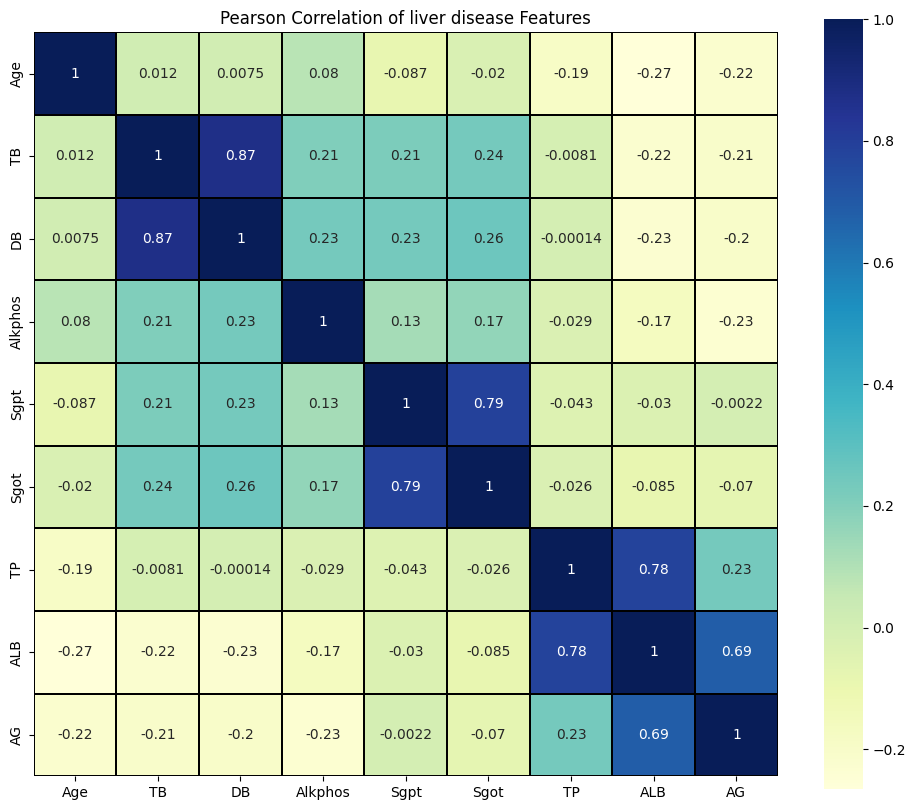

In [37]:
f, ax = plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of liver disease Features')
# Draw the heatmap using seaborn
sns.heatmap(df_num_features.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black',annot=True)

In [38]:
df_num_features

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG
0,65.0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90
1,62.0,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74
2,62.0,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89
3,58.0,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00
4,72.0,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60.0,0.5,0.1,500.0,20.0,34.0,5.9,1.6,0.37
579,40.0,0.6,0.1,98.0,35.0,31.0,6.0,3.2,1.10
580,52.0,0.8,0.2,245.0,48.0,49.0,6.4,3.2,1.00
581,31.0,1.3,0.5,184.0,29.0,32.0,6.8,3.4,1.00


# Training

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report

In [40]:
print(df_num_features)

      Age    TB   DB  Alkphos  Sgpt   Sgot   TP  ALB    AG
0    65.0   0.7  0.1    187.0  16.0   18.0  6.8  3.3  0.90
1    62.0  10.9  5.5    699.0  64.0  100.0  7.5  3.2  0.74
2    62.0   7.3  4.1    490.0  60.0   68.0  7.0  3.3  0.89
3    58.0   1.0  0.4    182.0  14.0   20.0  6.8  3.4  1.00
4    72.0   3.9  2.0    195.0  27.0   59.0  7.3  2.4  0.40
..    ...   ...  ...      ...   ...    ...  ...  ...   ...
578  60.0   0.5  0.1    500.0  20.0   34.0  5.9  1.6  0.37
579  40.0   0.6  0.1     98.0  35.0   31.0  6.0  3.2  1.10
580  52.0   0.8  0.2    245.0  48.0   49.0  6.4  3.2  1.00
581  31.0   1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00
582  38.0   1.0  0.3    216.0  21.0   24.0  7.3  4.4  1.50

[583 rows x 9 columns]


In [41]:
print(df_num_features.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    float64
 1   TB       583 non-null    float64
 2   DB       583 non-null    float64
 3   Alkphos  583 non-null    float64
 4   Sgpt     583 non-null    float64
 5   Sgot     583 non-null    float64
 6   TP       583 non-null    float64
 7   ALB      583 non-null    float64
 8   AG       583 non-null    float64
dtypes: float64(9)
memory usage: 41.1 KB
None


In [42]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    int64  
 1   Gender   583 non-null    object 
 2   TB       583 non-null    float64
 3   DB       583 non-null    float64
 4   Alkphos  583 non-null    int64  
 5   Sgpt     583 non-null    int64  
 6   Sgot     583 non-null    int64  
 7   TP       583 non-null    float64
 8   ALB      583 non-null    float64
 9   AG       579 non-null    float64
 10  class    583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [43]:
df_num_features['AG'].fillna(df_num_features['AG'].mean(),inplace=True)

In [44]:
df_num_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      583 non-null    float64
 1   TB       583 non-null    float64
 2   DB       583 non-null    float64
 3   Alkphos  583 non-null    float64
 4   Sgpt     583 non-null    float64
 5   Sgot     583 non-null    float64
 6   TP       583 non-null    float64
 7   ALB      583 non-null    float64
 8   AG       583 non-null    float64
dtypes: float64(9)
memory usage: 41.1 KB


In [45]:
x=df_num_features
y=df['class']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [46]:
print(x)

      Age    TB   DB  Alkphos  Sgpt   Sgot   TP  ALB    AG
0    65.0   0.7  0.1    187.0  16.0   18.0  6.8  3.3  0.90
1    62.0  10.9  5.5    699.0  64.0  100.0  7.5  3.2  0.74
2    62.0   7.3  4.1    490.0  60.0   68.0  7.0  3.3  0.89
3    58.0   1.0  0.4    182.0  14.0   20.0  6.8  3.4  1.00
4    72.0   3.9  2.0    195.0  27.0   59.0  7.3  2.4  0.40
..    ...   ...  ...      ...   ...    ...  ...  ...   ...
578  60.0   0.5  0.1    500.0  20.0   34.0  5.9  1.6  0.37
579  40.0   0.6  0.1     98.0  35.0   31.0  6.0  3.2  1.10
580  52.0   0.8  0.2    245.0  48.0   49.0  6.4  3.2  1.00
581  31.0   1.3  0.5    184.0  29.0   32.0  6.8  3.4  1.00
582  38.0   1.0  0.3    216.0  21.0   24.0  7.3  4.4  1.50

[583 rows x 9 columns]


In [47]:
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
578    2
579    1
580    1
581    1
582    2
Name: class, Length: 583, dtype: int64


In [48]:
print(X_train)

      Age    TB    DB  Alkphos   Sgpt   Sgot   TP  ALB    AG
271   4.0   0.8   0.2    460.0  152.0  231.0  6.5  3.2  0.90
318  38.0   3.7   2.2    216.0  179.0  232.0  7.8  4.5  1.30
552  45.0   0.6   0.1    196.0   29.0   30.0  5.8  2.9  1.00
579  40.0   0.6   0.1     98.0   35.0   31.0  6.0  3.2  1.10
196  60.0   2.0   1.1    664.0   52.0  104.0  6.0  2.1  0.53
..    ...   ...   ...      ...    ...    ...  ...  ...   ...
277  60.0   2.0   0.8    190.0   45.0   40.0  6.0  2.8  0.80
9    55.0   0.7   0.2    290.0   53.0   58.0  6.8  3.4  1.00
359  69.0   0.8   0.2    146.0   42.0   70.0  8.4  4.9  1.40
192  60.0   2.3   0.6    272.0   79.0   51.0  6.6  3.5  1.10
559  26.0  42.8  19.7    390.0   75.0  138.0  7.5  2.6  0.50

[408 rows x 9 columns]


In [49]:
print(X_test)

      Age   TB   DB  Alkphos   Sgpt   Sgot   TP  ALB    AG
246  55.0  1.8  9.0    272.0   22.0   79.0  6.1  2.7  0.70
92   60.0  8.6  4.0    298.0  412.0  850.0  7.4  3.0  0.60
386  38.0  2.7  1.4    105.0   25.0   21.0  7.5  4.2  1.20
186  60.0  3.2  1.8    750.0   79.0  145.0  7.8  3.2  0.69
389  72.0  0.6  0.1    102.0   31.0   35.0  6.3  3.2  1.00
..    ...  ...  ...      ...    ...    ...  ...  ...   ...
484  62.0  5.0  2.1    103.0   18.0   40.0  5.0  2.1  1.72
113  74.0  0.6  0.1    272.0   24.0   98.0  5.0  2.0  0.60
18   40.0  0.9  0.3    293.0  232.0  245.0  6.8  3.1  0.80
76   31.0  0.9  0.2    518.0  189.0   17.0  5.3  2.3  0.70
395  45.0  0.8  0.2    140.0   24.0   20.0  6.3  3.2  1.00

[175 rows x 9 columns]


In [50]:
print(Y_train)

271    2
318    1
552    1
579    1
196    1
      ..
277    1
9      1
359    2
192    1
559    1
Name: class, Length: 408, dtype: int64


In [51]:
results = {}

# Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifierModel = RandomForestClassifier(criterion = 'gini',n_estimators=20,max_depth=2,random_state=33) #criterion can be also : entropy
RandomForestClassifierModel.fit(X_train, Y_train)

#Calculating Details
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, Y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, Y_test))

RandomForestClassifierModel Train Score is :  0.7352941176470589
RandomForestClassifierModel Test Score is :  0.7028571428571428


In [53]:
y_pred = RandomForestClassifierModel.predict(X_test)
y_pred_prob = RandomForestClassifierModel.predict_proba(X_test)
print('Predicted Value for RandomForestClassifierModel is : ' , y_pred[:10])
print('Prediction Probabilities Value for RandomForestClassifierModel is : ' , y_pred_prob[:10])

Predicted Value for RandomForestClassifierModel is :  [1 1 1 1 1 1 1 1 1 1]
Prediction Probabilities Value for RandomForestClassifierModel is :  [[0.83681782 0.16318218]
 [0.93261188 0.06738812]
 [0.69819737 0.30180263]
 [0.93261188 0.06738812]
 [0.58876049 0.41123951]
 [0.61917504 0.38082496]
 [0.90094301 0.09905699]
 [0.70039893 0.29960107]
 [0.91600346 0.08399654]
 [0.56413699 0.43586301]]


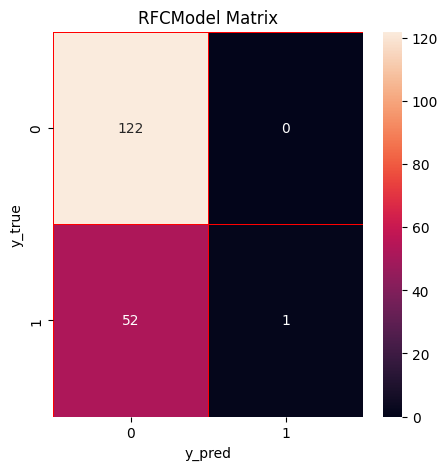

In [54]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=RandomForestClassifierModel.predict(X_test)
y_true=Y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("RFCModel Matrix")
plt.show()

In [55]:
# Saving the model
import pickle
pickle.dump(RandomForestClassifierModel, open('liver_rf.pkl', 'wb'))

In [56]:
print(df_num_features.columns)

Index(['Age', 'TB', 'DB', 'Alkphos', 'Sgpt', 'Sgot', 'TP', 'ALB', 'AG'], dtype='object')


In [57]:
f=open("liver_rf.pkl",'rb')

In [58]:
pkl=pickle.load(f)

In [59]:
l=[[17,0.9,0.3,202,22,19,7.4,4.1,1.20]]
pr=pkl.predict(l)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
print(pr)

[2]


In [61]:
if pr[0]==1:
    print("Liver Disease")
else:
    print("No Liver Disease")

No Liver Disease


In [62]:
con=pkl.predict_proba(l)
print(con)
results['RF'] = con[0][0]

[[0.46261294 0.53738706]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# Support Vector Classifier

In [63]:
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import SVC, LinearSVC
model_svc = LinearSVC()
model = CalibratedClassifierCV(model_svc)
model.fit(X_train, Y_train)
import pickle
filename = 'linearSVC.sav'
pickle.dump(model, open(filename, 'wb'))



/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppr

In [64]:
model = pickle.load(open(filename, 'rb'))
l=[[17,0.9,0.3,202,22,19,7.4,4.1,1.20]]
pred_class = model.predict(l)
probability = model.predict_proba(l)
print(pred_class)
print(probability)
results['SVC'] = probability[0][0]

[1]
[[0.58689023 0.41310977]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearSVC was fitted with

In [65]:
if pred_class[0]==1:
    print("Liver Disease")
else:
    print("No Liver Disease")

Liver Disease


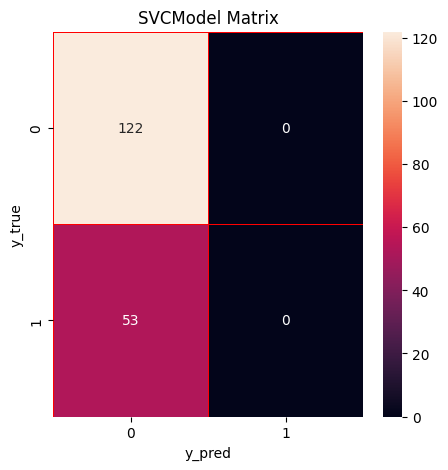

In [66]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
y_true=Y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("SVCModel Matrix")
plt.show()

In [67]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [68]:
nb.fit(X_train, Y_train)
score = nb.score(X_test, Y_test)
print("%s : %f %%" % ("Gausian Naive Bayes Classifier", score*100))

Gausian Naive Bayes Classifier : 57.142857 %


In [69]:
pickle.dump(nb, open('liver_nb.pkl', 'wb'))

In [70]:
l=[[17,0.9,0.3,202,22,19,7.4,4.1,1.20]]
f1=open('liver_nb.pkl','rb')
nb_model=pickle.load(f1)
p_nb=nb_model.predict(l)
print(p_nb)

[2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


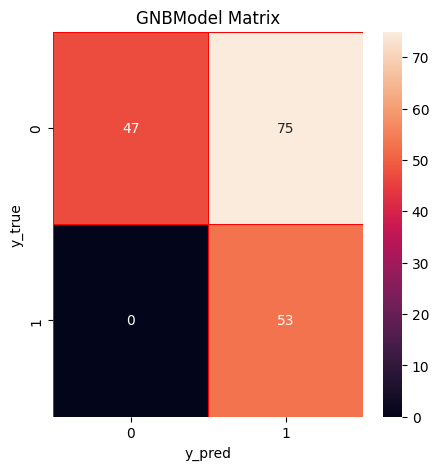

In [71]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=nb_model.predict(X_test)
y_true=Y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("GNBModel Matrix")
plt.show()

In [72]:
con=nb_model.predict_proba(l)
print(con)
results['GNB'] = con[0][0]

[[1.19007336e-04 9.99880993e-01]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [73]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [74]:
mlp.fit(X_train, Y_train)
score = mlp.score(X_test, Y_test)
print("%s : %f %%" % ("Deep Learning", score*100))

Deep Learning : 69.714286 %


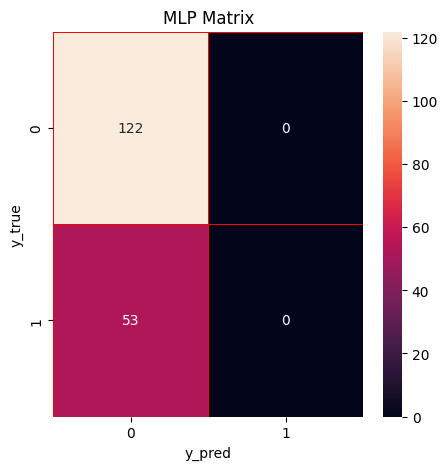

In [75]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=mlp.predict(X_test)
y_true=Y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("MLP Matrix")
plt.show()

In [76]:
con=mlp.predict_proba(l)
print(con)
results['MLP'] = con[0][0]

[[0.72058857 0.27941143]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


{'RF': 0.46261294100178574, 'SVC': 0.5868902261915696, 'GNB': 0.00011900733649035082, 'MLP': 0.7205885698768852}

Best algorithm is MLP with a 72.058857 % success


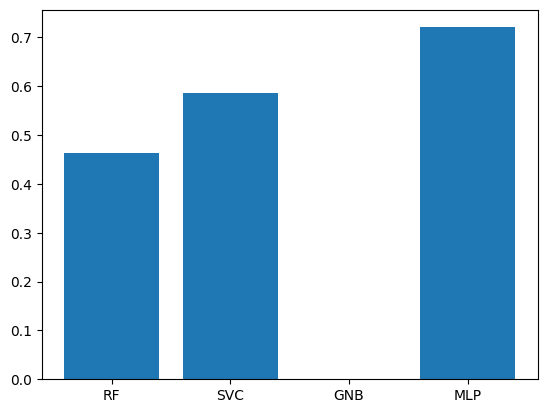

In [77]:
print(results)
D=results
plt.figure();
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
bestAlgo = max(results, key=results.get)
print('\nBest algorithm is %s with a %f %% success' % (bestAlgo, results[bestAlgo]*100))

In [78]:
winner = max(results, key=results.get)
winner

'MLP'

In [79]:
import joblib
if winner=='RF':
    joblib.dump(RandomForestClassifierModel,'best.pkl')
elif winner=='SVC':
    joblib.dump(model_svc,'best.pkl')
elif winner=='GNB':
    joblib.dump(nb_model,'best.pkl')
elif winner=='MLP':
    joblib.dump(mlp,'best.pkl')

In [ ]:
import prediction as p
l=[[63,0.7,0.1,187,16,18,6.8,3.3,.9]]
pred=p.predict(l)
print('pred',pred)
